# `dtreeviz` TensorFlow Decision Forests Examples

([View this notebook in Colab](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/dtreeviz_tensorflow_visualisations.ipynb))

The [dtreeviz](https://github.com/parrt/dtreeviz) library is designed to help machine learning practitioners visualize and interpret decision trees and decision-tree-based models, such as gradient boosting machines.  

The purpose of this notebook is to illustrate the main capabilities and functions of the dtreeviz API. To do that, we will use TensorFlow Decision Forests and the toy but well-known Titanic data set for illustrative purposes.  Currently, dtreeviz supports the following decision tree libraries:

* [scikit-learn](https://scikit-learn.org/stable)
* [XGBoost](https://xgboost.readthedocs.io/en/latest)
* [Spark MLlib](https://spark.apache.org/mllib/)
* [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
* [Tensorflow](https://www.tensorflow.org/decision_forests)

To interopt with these different libraries, dtreeviz uses an adaptor object, obtained from function `dtreeviz.model()`, to extract model information necessary for visualization. Given such an adaptor object, all of the dtreeviz functionality is available to you using the same programmer interface. The basic dtreeviz usage recipe is:

1. Import dtreeviz and your decision tree library
2. Acquire and load data into memory
3. Train a classifier or regressor model using your decision tree library
4. Obtain a dtreeviz adaptor model using<br>`viz_model = dtreeviz.model(your_trained_model,...)`
5. Call dtreeviz functions, such as<br>`viz_model.view()` or `viz_model.explain_prediction_path(sample_x)`

The four categories of dtreeviz functionality are:

1. Tree visualizations
2. Prediction path explanations
3. Leaf information
4. Feature space exploration

We have grouped code examples by [classifiers](#Classifiers) and [regressors](#Regressors), with a follow up section on [partitioning feature space](#Feature-Space-Partitioning).

*These examples require dtreeviz 2.0 or above because the code uses the new API introduced in 2.0.*

## Setup

In [1]:
import sys

In [2]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
  !pip install -q tensorflow_decision_forests

In [3]:
import tensorflow_decision_forests as tf
from tensorflow_decision_forests.tensorflow.core import Task

from sklearn.model_selection import train_test_split

import pandas as pd
from collections import defaultdict

import dtreeviz

random_state = 1234 # get reproducible trees

2023-02-17 10:20:13.737738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 10:20:13.884647: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 10:20:13.884672: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-17 10:20:14.564985: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

## Load Sample Data

In [4]:
random_state = 1234
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv"
dataset = pd.read_csv(dataset_url)
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes

dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes


# Classifiers

To demonstrate classifier decision trees, we trying to model using six features to predict the boolean survived target.

In [5]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

dataset_tf = tf.keras.pd_dataframe_to_tf_dataset(dataset[features + [target]], label=target)
model = tf.keras.RandomForestModel(num_trees=1, max_depth=4, random_seed = random_state)
model.fit(dataset_tf)

2023-02-17 10:20:16.254978: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-17 10:20:16.255017: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-17 10:20:16.255043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (parrt.c.googlers.com): /proc/driver/nvidia/version does not exist
2023-02-17 10:20:16.255406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Use /tmp/tmpu94q0lbl as temporary training directory
Reading training dataset...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:03.740834. Found 891 examples.
Training model...
Model trained in 0:00:00.025483
Compiling model...


[INFO 2023-02-17T10:20:20.123074892-08:00 kernel.cc:1214] Loading model from path /tmp/tmpu94q0lbl/model/ with prefix 063acca8ed974033
[INFO 2023-02-17T10:20:20.123889341-08:00 decision_forest.cc:661] Model loaded with 1 root(s), 15 node(s), and 6 input feature(s).
[INFO 2023-02-17T10:20:20.123926625-08:00 abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 2023-02-17T10:20:20.123950978-08:00 kernel.cc:1046] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


## Initialize dtreeviz model (adaptor)

To adapt dtreeviz to a specific model, use the `model()` function to get an adaptor.  You'll need to provide the model, X/y data, feature names, target name, and target class names:

In [6]:
viz_model = dtreeviz.model(model, tree_index=0, 
                             X_train=dataset[features], 
                             y_train=dataset[target], 
                             feature_names=features, 
                             target_name=target,
                             class_names=["perish", "survive"])

We'll use this model to demonstrate dtreeviz functionality in the following sections; the code will look the same for any decision tree library once we have this model adaptor.

## Tree structure visualizations
To show the decision tree structure using the default visualization, call `view()`:

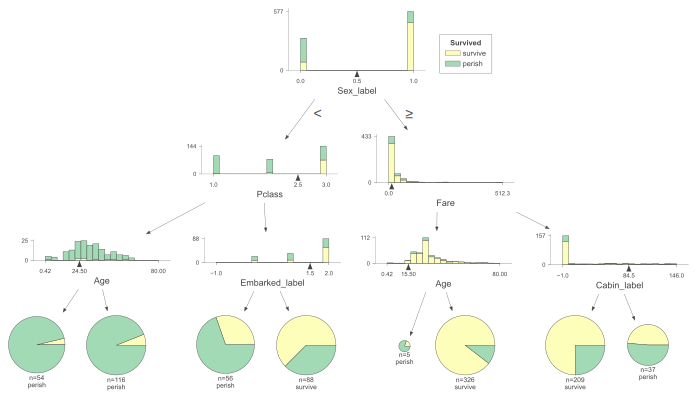

In [7]:
viz_model.view()

To change the visualization, you can pass parameters, such as changing the orientation to left-to-right:

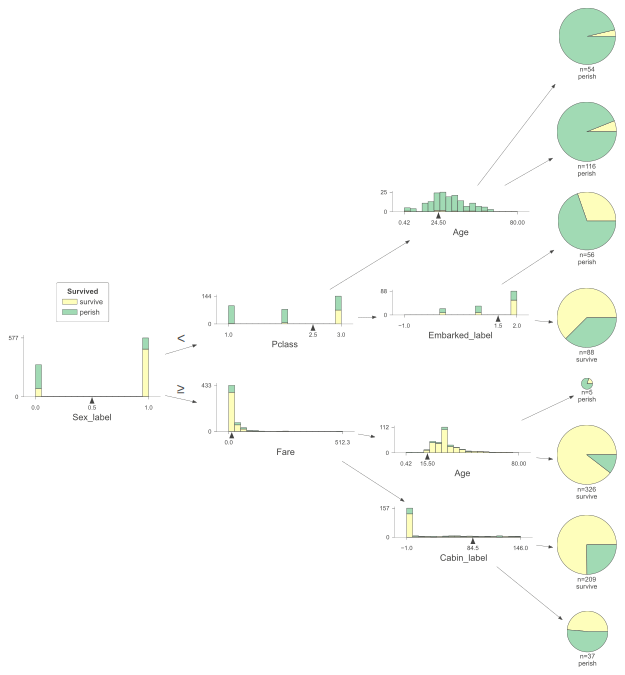

In [8]:
viz_model.view(orientation="LR")

To visualize larger trees, you can reduce the amount of detail by turning off the fancy view:

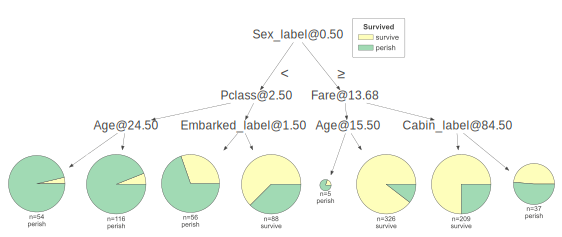

In [9]:
viz_model.view(fancy=False)

Another way to reduce the visualization size is to specify the tree depths of interest:

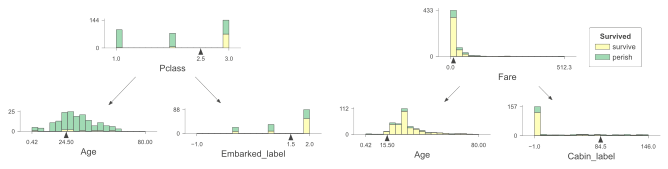

In [10]:
viz_model.view(depth_range_to_display=(1, 2)) # root is level 0

## Prediction path explanations

For interpretation purposes, we often want to understand how a tree behaves for a specific instance. Let's pick a specific instance:

In [11]:
x = dataset[features].iloc[10]
x

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

and then display the path through the tree structure:

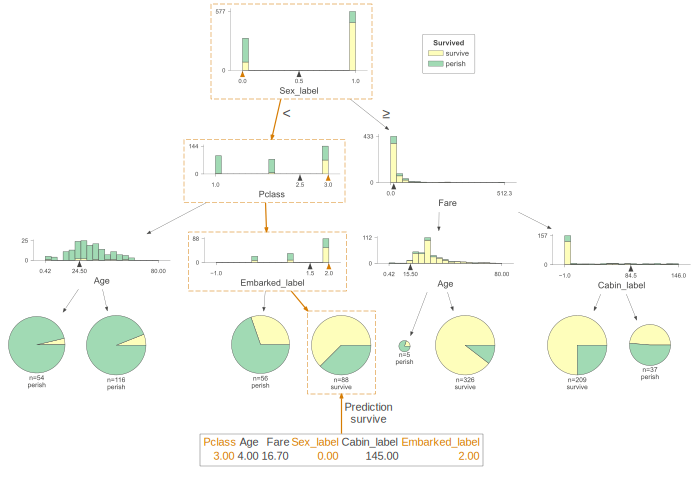

In [12]:
viz_model.view(x=x)

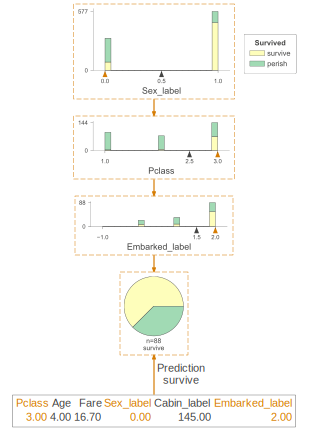

In [13]:
viz_model.view(x=x, show_just_path=True)

You can also get a string representation explaining the comparisons made as an instance is run down the tree:

In [14]:
print(viz_model.explain_prediction_path(x))

2.5 <= Pclass 
Sex_label < 0.5
1.5 <= Embarked_label 



## Leaf info

There are a number of functions to get information about the leaves of the tree.

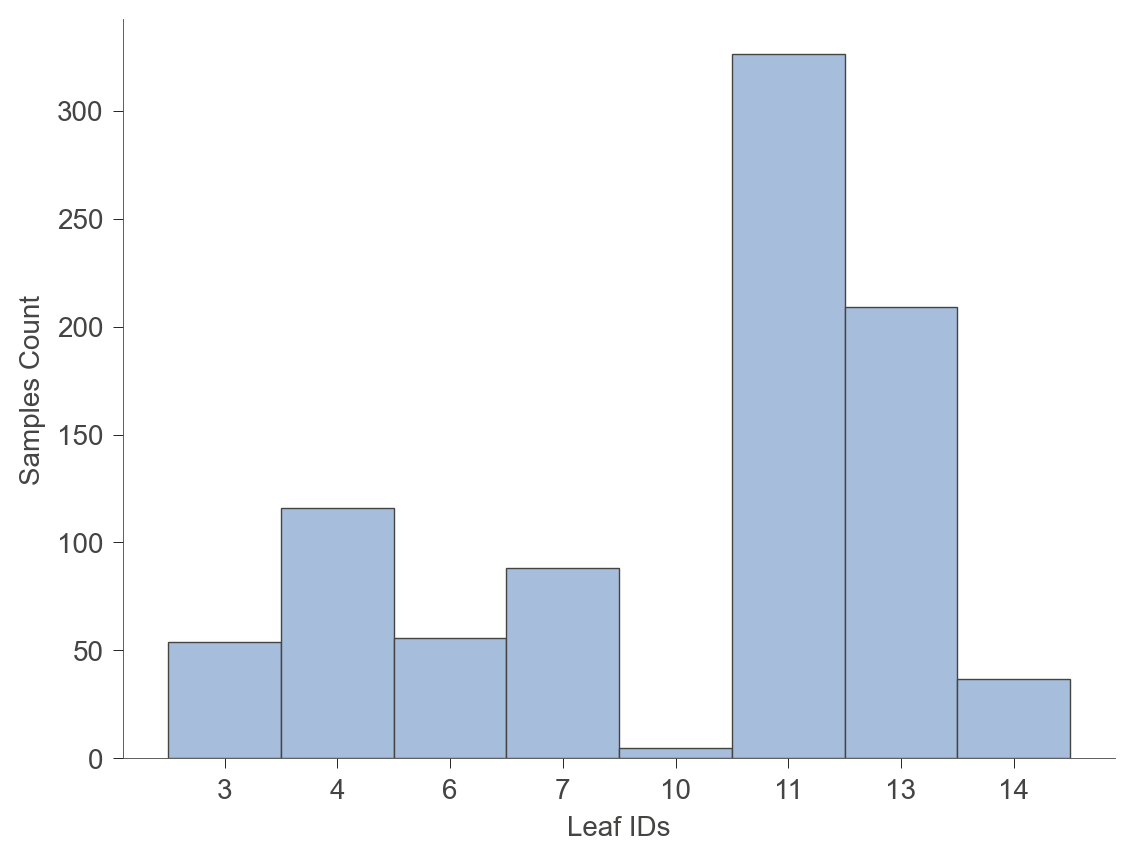

In [15]:
viz_model.leaf_sizes()

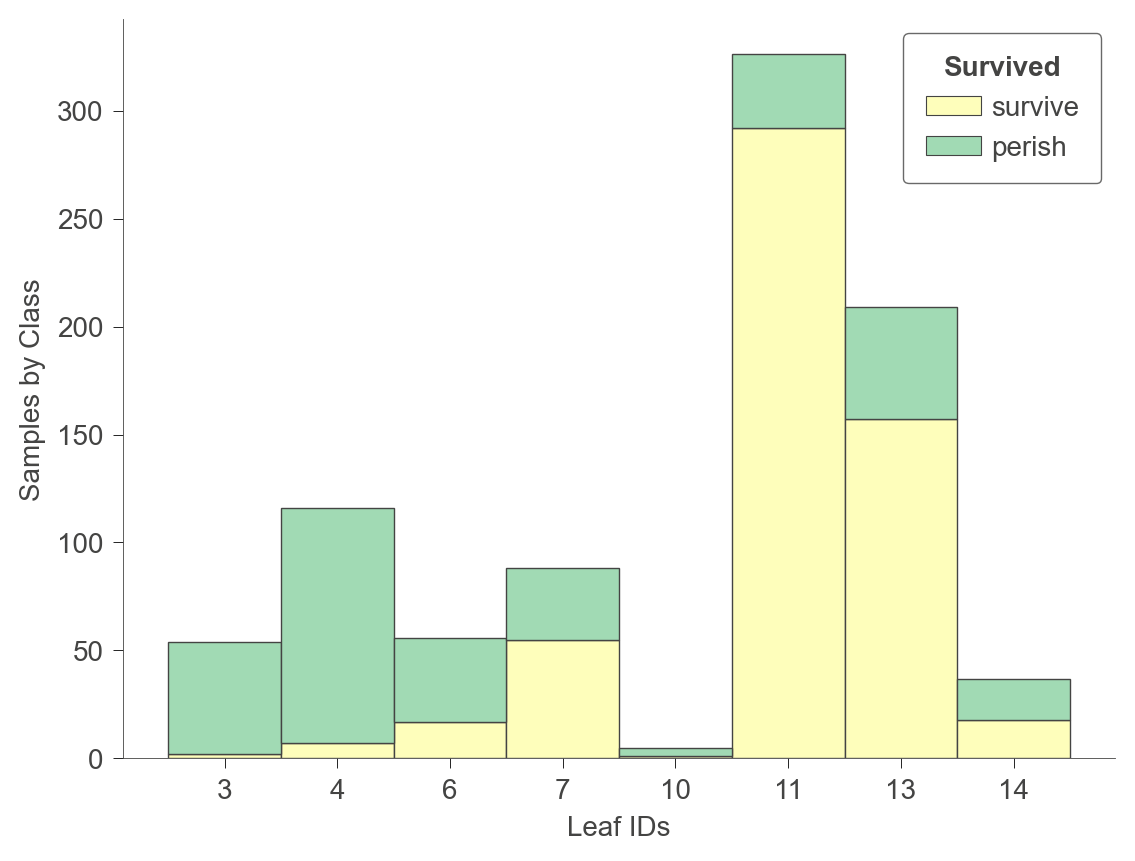

In [16]:
viz_model.ctree_leaf_distributions()

In [17]:
viz_model.node_stats(node_id=4)

Pclass         Age        Fare  Sex_label  Cabin_label  \
count  116.000000  116.000000  116.000000      116.0   116.000000   
mean     1.422414   38.311985   67.650287        0.0    41.474138   
std      0.496087    9.732023   68.604358        0.0    48.230328   
min      1.000000   25.000000   10.500000        0.0    -1.000000   
25%      1.000000   30.000000   23.000000        0.0    -1.000000   
50%      1.000000   35.500000   52.000000        0.0    21.000000   
75%      2.000000   45.000000   86.500000        0.0    86.250000   
max      2.000000   63.000000  512.329200        0.0   142.000000   

       Embarked_label  
count      116.000000  
mean         1.353448  
std          0.953295  
min         -1.000000  
25%          0.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

# Regressors

To demonstrate regressor tree visualization, we start by creating a regressors model that predicts age instead of survival:

In [18]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"

dataset_rtf = tf.keras.pd_dataframe_to_tf_dataset(dataset[features_reg + [target_reg]], label = target_reg, task=Task.REGRESSION)

model_reg = tf.keras.RandomForestModel(num_trees=4, max_depth=4, random_seed = random_state, bootstrap_training_dataset=False, sampling_with_replacement=False, task=Task.REGRESSION)
model_reg.fit(dataset_rtf)




Use /tmp/tmpafba4jbd as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.183495. Found 891 examples.
Training model...
Model trained in 0:00:00.020450
Compiling model...
Model compiled.


2023-02-17 10:20:28.398807: W external/ydf/yggdrasil_decision_forests/model/random_forest/random_forest.cc:610] ValidationEvaluation requires OOB evaluation enabled.Random Forest models should be trained with compute_oob_performances:true. CART models do not support OOB evaluation.
[INFO 2023-02-17T10:20:28.405062927-08:00 kernel.cc:1214] Loading model from path /tmp/tmpafba4jbd/model/ with prefix 8d3a821f5d6f464a
[INFO 2023-02-17T10:20:28.405632035-08:00 decision_forest.cc:661] Model loaded with 4 root(s), 58 node(s), and 6 input feature(s).
[INFO 2023-02-17T10:20:28.405669482-08:00 kernel.cc:1046] Use fast generic engine


## Initialize dtreeviz model (adaptor)

In [19]:
viz_rmodel = dtreeviz.model(model_reg, tree_index=0, 
                             X_train=dataset[features_reg], 
                             y_train=dataset[target_reg], 
                             feature_names=features_reg, 
                             target_name=target_reg)

## Tree structure visualisations

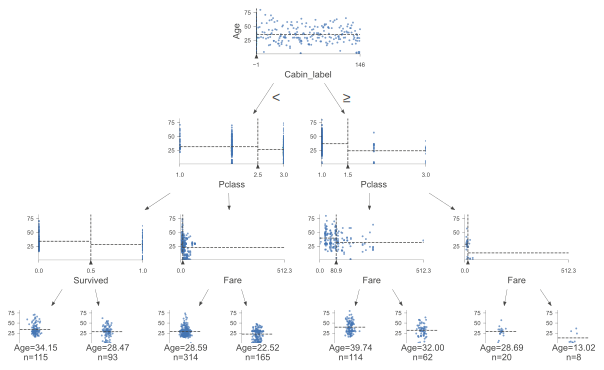

In [20]:
viz_rmodel.view()

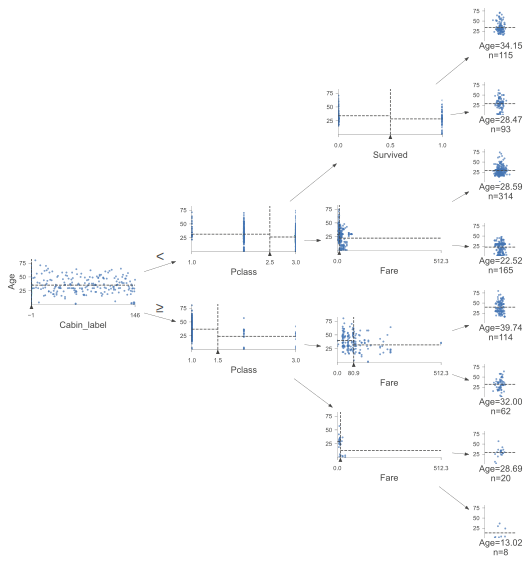

In [21]:
viz_rmodel.view(orientation="LR")

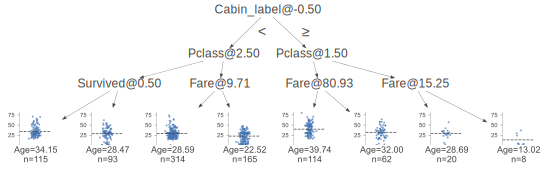

In [22]:
viz_rmodel.view(fancy=False)

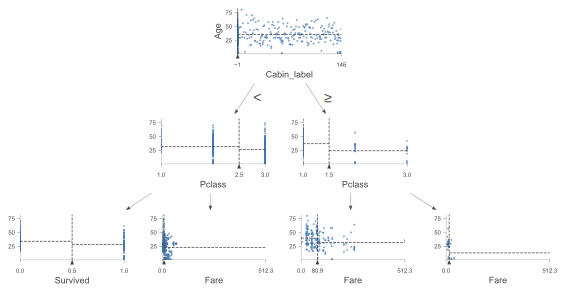

In [23]:
viz_rmodel.view(depth_range_to_display=(0, 2))

## Prediction path explanations

In [24]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

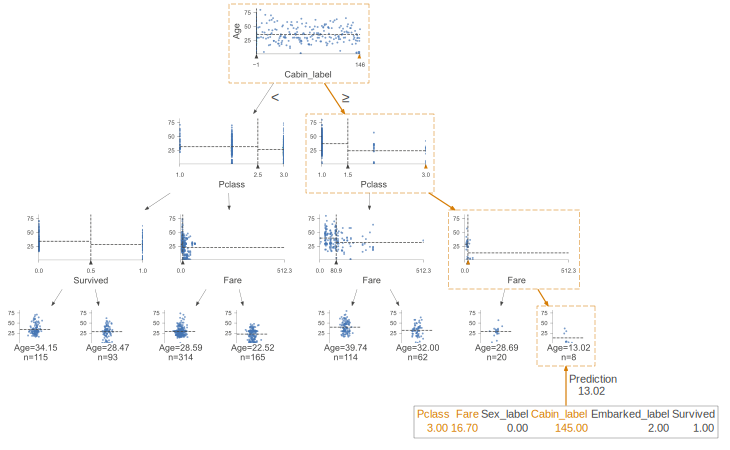

In [25]:
viz_rmodel.view(x = x)

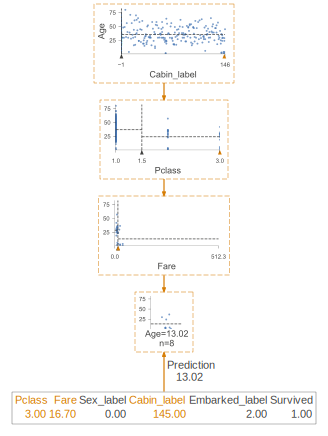

In [26]:
viz_rmodel.view(show_just_path=True, x = x)

In [27]:
print(viz_rmodel.explain_prediction_path(x))

1.5 <= Pclass 
15.25 <= Fare 
-0.5 <= Cabin_label 



## Leaf info

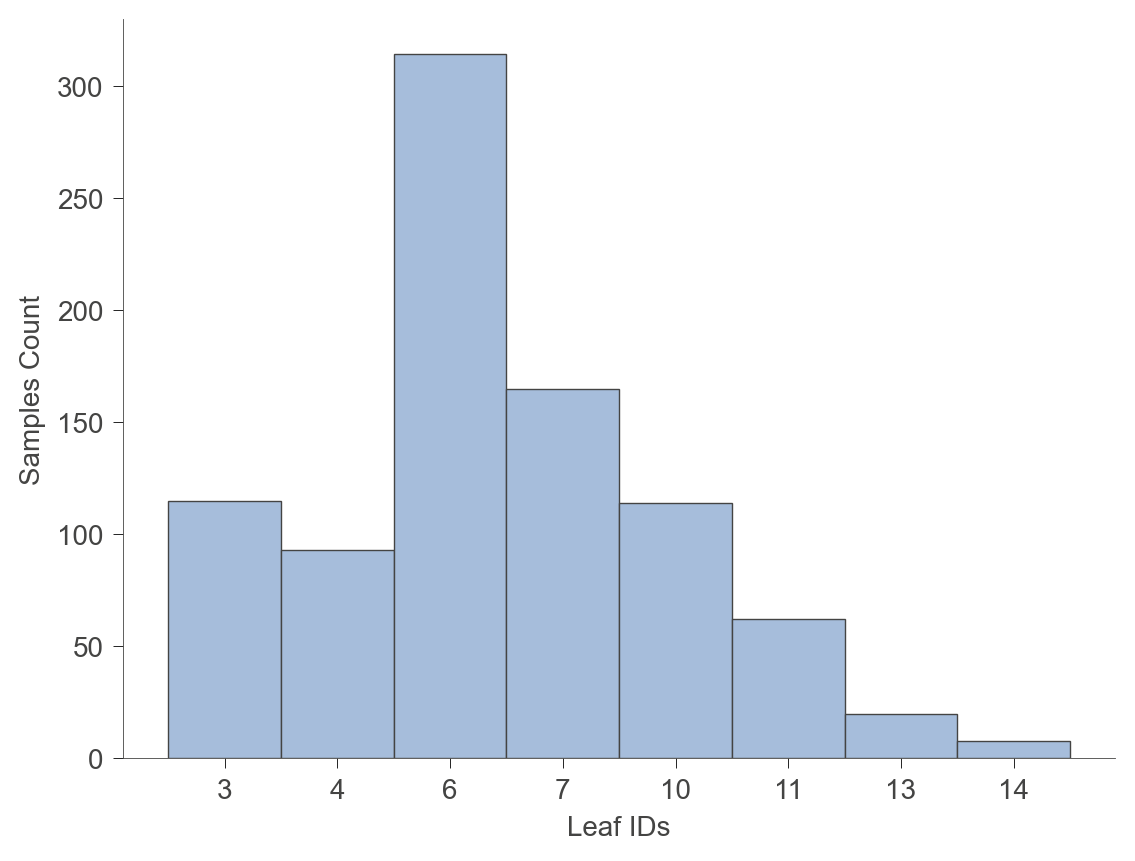

In [28]:
viz_rmodel.leaf_sizes()

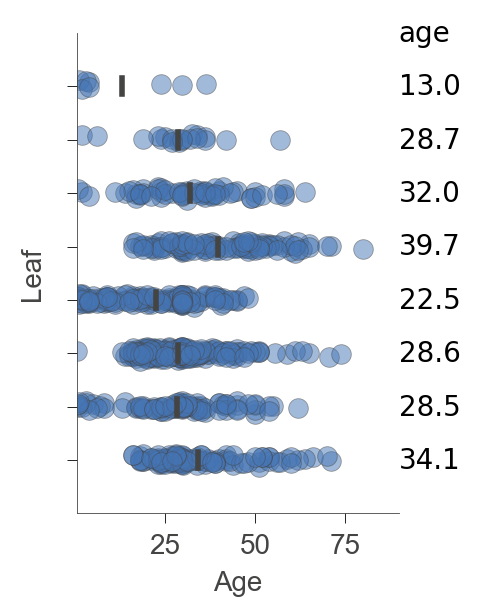

In [29]:
viz_rmodel.rtree_leaf_distributions()

In [30]:
viz_rmodel.node_stats(node_id=6)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   314.0  314.000000  314.000000        314.0      314.000000  314.000000
mean      3.0    7.745526    0.808917         -1.0        1.595541    0.207006
std       0.0    1.078506    0.393782          0.0        0.691421    0.405807
min       3.0    0.000000    0.000000         -1.0        0.000000    0.000000
25%       3.0    7.550000    1.000000         -1.0        1.000000    0.000000
50%       3.0    7.854200    1.000000         -1.0        2.000000    0.000000
75%       3.0    8.050000    1.000000         -1.0        2.000000    0.000000
max       3.0    9.587500    1.000000         -1.0        2.000000    1.000000

# Feature Space Partitioning

Decision trees partition feature space in such a way as to maximize target value purity for the instances associated with a node. It's often useful to visualize the feature space partitioning, although it's not feasible to visualize more than a couple of dimensions.

*work in progress for this library*

See [Feature Space Partitioning for scikit-learn](dtreeviz_sklearn_visualisations.ipynb#Feature_Space_Partitioning) for now.